In [1]:
import os
import pandas as pd
import numpy as np
from glob import glob
import nibabel as nib
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker, NiftiSpheresMasker
from sklearn import preprocessing
from nilearn.image import new_img_like, get_data
from nilearn.plotting import plot_roi
from sklearn.metrics import silhouette_score
import sklearn as skl
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Open a datasets directory. 
emofilm_path = os.open("/Users/la/Documents/Datasets/EmoFilm", os.O_RDONLY)

# Use os.fchdir() method to change the current dir/folder.
os.fchdir(emofilm_path)

# Safe check- Print current working directory
print("Current working dir : %s" % os.getcwd())

Current working dir : /Users/la/Documents/Datasets/EmoFilm


In [4]:
sub_list =  os.listdir(emofilm_path) #glob(os.path.join(os.getcwd(), "*"))

sub_list.remove('.DS_Store')
sub_list.remove('.git')

# Order the list of subjects
sub_list.sort()
sub_list


['sub-S01',
 'sub-S02',
 'sub-S03',
 'sub-S04',
 'sub-S05',
 'sub-S06',
 'sub-S07',
 'sub-S08',
 'sub-S09',
 'sub-S10',
 'sub-S11',
 'sub-S13',
 'sub-S14',
 'sub-S15',
 'sub-S16',
 'sub-S17',
 'sub-S19',
 'sub-S20',
 'sub-S21',
 'sub-S22',
 'sub-S23',
 'sub-S24',
 'sub-S25',
 'sub-S26',
 'sub-S27',
 'sub-S28',
 'sub-S29',
 'sub-S30',
 'sub-S31',
 'sub-S32']

In [5]:
# Load cortical and sub-cortical HO atlas. 
cortical_atlas = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr50-2mm")
cortical_atlas_maps = cortical_atlas.maps
cortical_atlas_labels = cortical_atlas.labels

subcortical_atlas = datasets.fetch_atlas_harvard_oxford("sub-maxprob-thr50-2mm")
subcortical_atlas_maps = subcortical_atlas.maps
subcortical_atlas_labels = subcortical_atlas.labels

# Load Seitzman atlas.
seitzman_atlas = datasets.fetch_coords_seitzman_2018()
seitzman_atlas_coords = seitzman_atlas["rois"]
seitzman_atlas_labels = seitzman_atlas["regions"]
seitzman_atlas_radius = seitzman_atlas["radius"]

# Load Pauli atlas.
pauli_atlas = datasets.fetch_atlas_pauli_2017(version='det')
pauli_atlas_maps = pauli_atlas.maps
pauli_atlas_labels = pauli_atlas.labels

# Create maskers for the cortical and subcortical HO atlas.
masker_HO_Cortical_ROI =  NiftiLabelsMasker(
    labels_img=cortical_atlas_maps,
    allow_overlap=True,
    smoothing_fwhm=4, 
    detrend=False,
    standardize='zscore', 
    t_r=2,
    standardize_confounds=False,
    high_pass=1/360)
    
masker_HO_Subcortical_ROI = NiftiLabelsMasker(
    labels_img=subcortical_atlas_maps,
    allow_overlap=True,
    smoothing_fwhm=4, 
    detrend=False,
    standardize='zscore', 
    t_r=2,
    standardize_confounds=False,
    high_pass=1/360)

# Create masker for the Seitzman atlas.
masker_Seitzman_ROI = NiftiSpheresMasker(
    seeds=seitzman_atlas_coords,
    radius=5, # mean radius of the ROIs is 4.79.
    allow_overlap=True,
    smoothing_fwhm=4, 
    detrend=False,
    standardize='zscore', 
    t_r=2,
    standardize_confounds=False,
    high_pass=1/360)

# Create masker for the Pauli atlas.
masker_Pauli_ROI = NiftiLabelsMasker(
    labels_img=pauli_atlas_maps,
    allow_overlap=True,
    smoothing_fwhm=4, 
    detrend=False,
    standardize='zscore', 
    t_r=2,
    standardize_confounds=False,
    high_pass=1/360)

In [12]:
print("Paulie atlas labels: ", pauli_atlas_labels)
len(pauli_atlas_labels)
[1], [2] , [10] [12:15]

Paulie atlas labels:  ['Pu', 'Ca', 'NAC', 'EXA', 'GPe', 'GPi', 'SNc', 'RN', 'SNr', 'PBP', 'VTA', 'VeP', 'HN', 'HTH', 'MN', 'STH']


16

In [6]:
# print("HO Cortical labels (" + str(len(cortical_atlas_labels[1:])) + "): " + str(cortical_atlas_labels[1:]))
# print("HO Subcortical labels (" +  str(len(subcortical_atlas_labels[1:])) + "): " + str(subcortical_atlas_labels[1:]))

# # From sub-cortical atlas remove left white matter (0), left cerebral cortex (1), left lateral ventrical (2), rigth white matter (11), right cerebral cortex (12), right lateral ventrical (13)

# #print(cortical_atlas_maps.shape)

# subcortical_atlas_labels[12]


In [51]:
test_sub_Cortical_ROI = masker_HO_Cortical_ROI.fit_transform("/Users/la/Documents/Datasets/EmoFilm/sub-S01/ses-1/func/sub-S01_ses-1_task-BigBuckBunny_space-MNI_desc-ppres_bold.nii.gz")
test_sub_Subcortical_ROI = masker_HO_Subcortical_ROI.fit_transform("/Users/la/Documents/Datasets/EmoFilm/sub-S01/ses-1/func/sub-S01_ses-1_task-BigBuckBunny_space-MNI_desc-ppres_bold.nii.gz")

#test_sub_Seitzman_ROI = masker_Seitzman_ROI.fit_transform("/Users/la/Documents/Datasets/EmoFilm/sub-S01/ses-1/func/sub-S01_ses-1_task-BigBuckBunny_space-MNI_desc-ppres_bold.nii.gz")

#test_sub_Pauli_ROI = masker_Pauli_ROI.fit_transform("/Users/la/Documents/Datasets/EmoFilm/sub-S01/ses-1/func/sub-S01_ses-1_task-BigBuckBunny_space-MNI_desc-ppres_bold.nii.gz")

#print(test_sub_Seitzman_ROI.shape)
print(test_sub_Cortical_ROI.shape)
print(test_sub_Subcortical_ROI.shape)   
#print(test_sub_Pauli_ROI.shape)


(528, 48)
(528, 21)


In [54]:


sessions_list = ['ses-1', 'ses-2', 'ses-3', 'ses-4']
movie_labels = ['BigBuckBunny', "YouAgain", "FirstBite", 
                "AfterTheRain", "LessonLearned", "Payload", "TheSecretNumber",
                "BetweenViewings", "Chatter", "Spaceman", "ToClaireFromSonny",
                "Superhero", "TearsOfSteel", "Sintel"]
                
                

sub_AllSessions_ROI_matrix = np.array([]).reshape(0, 63)

for sub_id in sub_list:

    # Print current subject.
    print("Current subject: ", sub_id)

    # Create a folder for the subject.
    #os.mkdir(sub_id)

    # Create array for current subject.
    current_sub_ROI_matrix = np.array([]).reshape(0, 63)

    # Check if the subject has a parcellated file.
    current_sub_file_name = str(sub_id + '_HO.npy')

    # Check if file exists.
    if os.path.isfile(os.path.join(os.getcwd(), sub_id, 'parcellated', current_sub_file_name)):
    #if os.path.isdir(os.path.join(os.getcwd(), sub_id, 'parcellated')):

        # Load numpy data. 
        current_sub_ROI_matrix = np.load(str(os.path.join(os.getcwd(), sub_id, 'parcellated', current_sub_file_name)))

    else: 

        # Create a folder for the subject.
        try:
            os.mkdir(os.path.join(os.getcwd(), sub_id, 'parcellated'))
        except FileExistsError:
            pass

        # Loop through the sessions.
        for session_id in sessions_list:

            # Set paths for session 1. 
            #session_id_full = session_id + '/func/'
            current_session_path = os.path.join(os.getcwd(), sub_id, session_id, 'func')

            current_session_files = glob(os.path.join(current_session_path, "*nii.gz"))

            # Loop through the files in the session 1 folder.
            for file_id in current_session_files:

                # Extract ROI data from the cortical and sub-cortical atlas.
                #sub_Seitzman_ROI = masker_Seitzman_ROI.fit_transform(file_id)
                #sub_Pauli_ROI = masker_Pauli_ROI.fit_transform(file_id)

                sub_Cortical_ROI = masker_HO_Cortical_ROI.fit_transform(file_id)
                sub_Subcortical_ROI = masker_HO_Subcortical_ROI.fit_transform(file_id)

                # Remove non-rois from sub-cortical ROI.
                sub_Subcortical_ROI = np.delete(sub_Subcortical_ROI, [0,1,2,11,12,13], axis=1)

                # Concat cortical and sub-cortical ROI into a single matrix. 
                sub_Cort_SubCort_matrix = np.concatenate((sub_Cortical_ROI, sub_Subcortical_ROI), axis=1) 

                # Concatenate the current matrix to the matrix with data from current sub.
                current_sub_ROI_matrix = np.concatenate((sub_Cort_SubCort_matrix, current_sub_ROI_matrix), axis=0)

            # Print progress...
            print("With " + str(sub_id) + " " + str(session_id) + " matrix shape: ", current_sub_ROI_matrix.shape)  

        # Save numpy array to file.
        save_path = os.path.join(os.getcwd(), sub_id, 'parcellated') + '/' + current_sub_file_name
        np.save(save_path, current_sub_ROI_matrix)

    # Concatenate the current matrix to the matrix with data from all subs.
    sub_AllSessions_ROI_matrix = np.concatenate((current_sub_ROI_matrix, sub_AllSessions_ROI_matrix), axis=0)
    print("With " + str(sub_id) + " All sessions matrix shape: ", sub_AllSessions_ROI_matrix.shape)

print("All sessions matrix final shape: ", sub_AllSessions_ROI_matrix.shape)

Current subject:  sub-S01
With sub-S01 ses-1 matrix shape:  (2369, 63)
With sub-S01 ses-2 matrix shape:  (5254, 63)
With sub-S01 ses-3 matrix shape:  (7734, 63)
With sub-S01 ses-4 matrix shape:  (9999, 63)
With sub-S01 All sessions matrix shape:  (9999, 63)
Current subject:  sub-S02
With sub-S02 ses-1 matrix shape:  (2394, 63)
With sub-S02 ses-2 matrix shape:  (5102, 63)
With sub-S02 ses-3 matrix shape:  (7477, 63)
With sub-S02 ses-4 matrix shape:  (10010, 63)
With sub-S02 All sessions matrix shape:  (20009, 63)
Current subject:  sub-S03
With sub-S03 ses-1 matrix shape:  (2168, 63)
With sub-S03 ses-2 matrix shape:  (5316, 63)
With sub-S03 ses-3 matrix shape:  (7785, 63)
With sub-S03 ses-4 matrix shape:  (10014, 63)
With sub-S03 All sessions matrix shape:  (30023, 63)
Current subject:  sub-S04
With sub-S04 ses-1 matrix shape:  (2601, 63)
With sub-S04 ses-2 matrix shape:  (5331, 63)
With sub-S04 ses-3 matrix shape:  (7533, 63)
With sub-S04 ses-4 matrix shape:  (10034, 63)
With sub-S04 Al

KeyboardInterrupt: 

In [ ]:
"""
            #sub_Cortical_ROI = masker_HO_Cortical_ROI.fit_transform(file_id)
            #sub_Subcortical_ROI = masker_HO_Subcortical_ROI.fit_transform(file_id)

            # Remove non-rois from sub-cortical ROI.
            #sub_Subcortical_ROI = np.delete(sub_Subcortical_ROI, [0,1,2,11,12,13], axis=1)

            # Concat cortical and sub-cortical ROI into a single matrix. 
            #sub_Cort_SubCort_matrix = np.concatenate((sub_Cortical_ROI, sub_Subcortical_ROI), axis=1) 
"""

'\n            #sub_Cortical_ROI = masker_HO_Cortical_ROI.fit_transform(file_id)\n            #sub_Subcortical_ROI = masker_HO_Subcortical_ROI.fit_transform(file_id)\n\n            # Remove non-rois from sub-cortical ROI.\n            #sub_Subcortical_ROI = np.delete(sub_Subcortical_ROI, [0,1,2,11,12,13], axis=1)\n\n            # Concat cortical and sub-cortical ROI into a single matrix. \n            #sub_Cort_SubCort_matrix = np.concatenate((sub_Cortical_ROI, sub_Subcortical_ROI), axis=1) \n'

In [62]:
sub_AllSessions_ROI_matrix.shape

subset_data = sub_AllSessions_ROI_matrix[0:10000, :]
#np.delete(sub_AllSessions_ROI_matrix, [0, 3, 4,5, 6, 7, 8, 9, 11], axis=1)[0:5000, :] 

subset_data.shape

(10000, 63)

In [64]:

#sub_AllSessions_ROI_matrix = np.delete(sub_AllSessions_ROI_matrix, [48, 49, 50, 59, 60, 61], axis=1)

# Scaling the new data frame for clustering
sc = preprocessing.StandardScaler()

sub_AllSessions_ROI_matrix_scaled = sc.fit_transform(sub_AllSessions_ROI_matrix)

wcss=[]
sil_scores = []

k = 100

k_range = range(2, k)
for i in k_range:
    #print("Fitting model with ", i, " clusters.")
    kmeans = skl.cluster.KMeans(n_clusters=i, init='k-means++', max_iter=200)
    #kmeans = skl.cluster.SpectralClustering(n_clusters=i, eigen_solver='amg', affinity='nearest_neighbors', assign_labels='cluster_qr', n_jobs=3)
    kmeans.fit(sub_AllSessions_ROI_matrix_scaled)
    wcss.append(kmeans.inertia_)

    sil_scores.append(silhouette_score(sub_AllSessions_ROI_matrix_scaled, kmeans.labels_))
    silhouette_avg = silhouette_score(sub_AllSessions_ROI_matrix_scaled, kmeans.labels_)
    print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)
    


For n_clusters = 2 The average silhouette_score is : 0.15477162830500288
For n_clusters = 3 The average silhouette_score is : 0.11944016439225177


KeyboardInterrupt: 

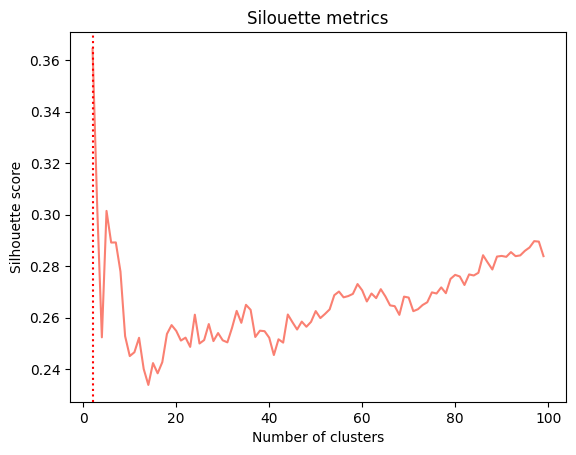

In [59]:
plt.plot(range(2, k), sil_scores, color = 'salmon')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silouette metrics')
plt.axvline(x = sil_scores.index(max(sil_scores))+2, linestyle = 'dotted', color = 'red') 
plt.show()

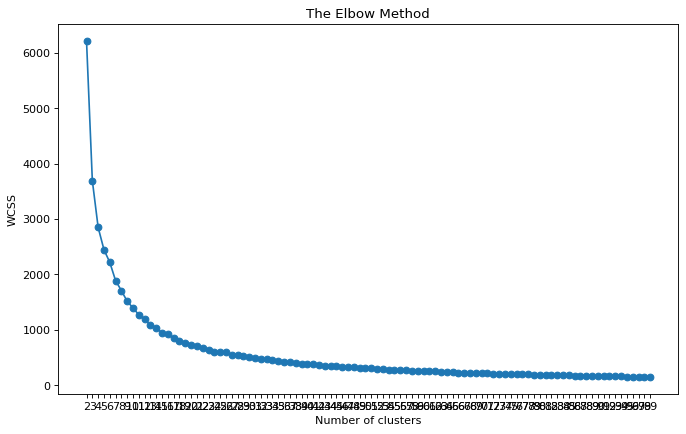

In [57]:


fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
plt.plot(k_range, wcss, marker='o')
# for i, value in enumerate(wcss):
#     ax.text(i+1.05, value-0.005, round(value,1), fontsize=12, fontweight='bold')
    
plt.xticks(k_range)
# plt.grid()
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()